In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # no more warnings 

### Show the dataframe shape.

In [3]:
data=pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
data.shape

(10910, 26)

### Standardize header names.

In [5]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
cols1 = [col_name.lower().replace(' ', '_') for col_name in data.columns]
cols1

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [7]:
data.columns= cols1
data.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [8]:
data = data.drop(["unnamed:_0"], axis = 1)

In [9]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### Which columns are numerical?

In [10]:
data.select_dtypes(include=['float64'])

,customer_lifetime_value,months_since_last_claim,number_of_open_complaints,total_claim_amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


### Which columns are categorical?

In [11]:
data.select_dtypes(include=['object'])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


### Check and deal with NaN values.

In [12]:
data.isna().sum().sum()

9254

### Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [13]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date']).dt.to_period('M')
data['effective_to_date']

0        2011-02
1        2011-01
2        2011-02
3        2011-01
4        2011-01
          ...   
10905    2011-01
10906    2011-01
10907    2011-02
10908    2011-02
10909    2011-01
Name: effective_to_date, Length: 10910, dtype: period[M]

In [14]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [15]:
datajan= data.loc[data['effective_to_date'].dt.month == 1]
datajan
  

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
1,KX64629,California,2228.525238,No,Basic,College,2011-01,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
8,FM55990,California,5989.773931,Yes,Premium,College,2011-01,Employed,M,66839,Suburban,Single,154,33.0,24,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
9,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01,Employed,F,70961,Suburban,Married,85,19.0,8,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01,Employed,F,28304,Suburban,Married,91,10.0,30,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01,Employed,M,59855,Suburban,Married,74,30.0,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


In [16]:
datafeb= data.loc[data['effective_to_date'].dt.month == 2]
datafeb

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02,Employed,F,37405,Urban,Married,63,8.0,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,WU60905,California,8610.667489,No,Basic,High School or Below,2011-02,Unemployed,F,0,Suburban,Married,111,27.0,36,0.0,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,A
10900,VN73653,Oregon,6423.739052,No,Basic,College,2011-02,Unemployed,M,0,Suburban,Single,188,5.0,67,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,NaN
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [17]:
datamarch= data.loc[data['effective_to_date'].dt.month == 3]
datamarch

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type


## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
### Show DataFrame info
    

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype    
---  ------                         --------------  -----    
 0   customer                       10910 non-null  object   
 1   state                          10279 non-null  object   
 2   customer_lifetime_value        10910 non-null  float64  
 3   response                       10279 non-null  object   
 4   coverage                       10910 non-null  object   
 5   education                      10910 non-null  object   
 6   effective_to_date              10910 non-null  period[M]
 7   employmentstatus               10910 non-null  object   
 8   gender                         10910 non-null  object   
 9   income                         10910 non-null  int64    
 10  location_code                  10910 non-null  object   
 11  marital_status                 10910 non-null  object   
 12  monthly_premium_au

### Describe DataFrame.

In [19]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Show a plot of the total number of responses.

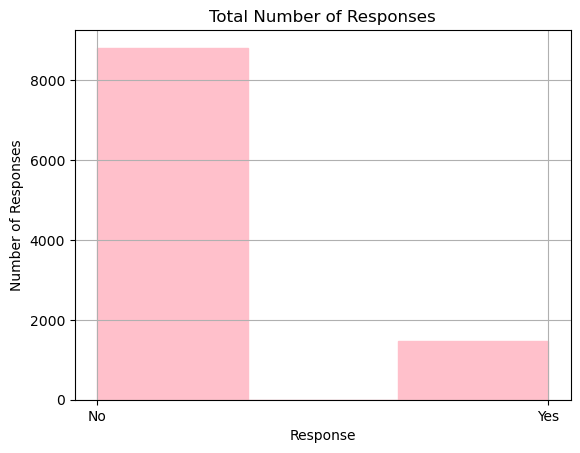

In [20]:
data['response'].hist( bins=3, facecolor='pink',edgecolor='pink')
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.show()


### Show a plot of the response rate by the sales channel.

In [21]:
response_sales= data.filter(items= ['response', 'sales_channel'])
print(response_sales)

      response sales_channel
0           No         Agent
1           No   Call Center
2           No   Call Center
3          Yes        Branch
4           No        Branch
...        ...           ...
10905       No           Web
10906       No        Branch
10907       No           Web
10908       No        Branch
10909      NaN           Web

[10910 rows x 2 columns]


In [22]:
response_yes= response_sales.loc[response_sales['response'] == 'Yes']
print(response_yes)

      response sales_channel
3          Yes        Branch
8          Yes        Branch
15         Yes        Branch
19         Yes   Call Center
27         Yes         Agent
...        ...           ...
10844      Yes         Agent
10852      Yes   Call Center
10872      Yes         Agent
10887      Yes         Agent
10897      Yes         Agent

[1466 rows x 2 columns]


In [23]:
response_no=response_sales.loc[response_sales['response']== 'No']
print(response_no)

      response sales_channel
0           No         Agent
1           No   Call Center
2           No   Call Center
4           No        Branch
6           No        Branch
...        ...           ...
10904       No        Branch
10905       No           Web
10906       No        Branch
10907       No           Web
10908       No        Branch

[8813 rows x 2 columns]


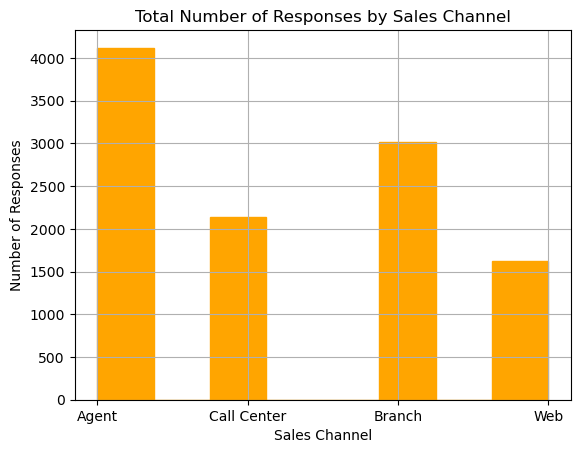

In [24]:
response_sales['sales_channel'].hist(bins= 8, facecolor='orange', edgecolor='orange')
plt.title('Total Number of Responses by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Responses')
plt.show()
                              

Text(0.5, 1.0, 'Total Number of Responses by Sales Channel')

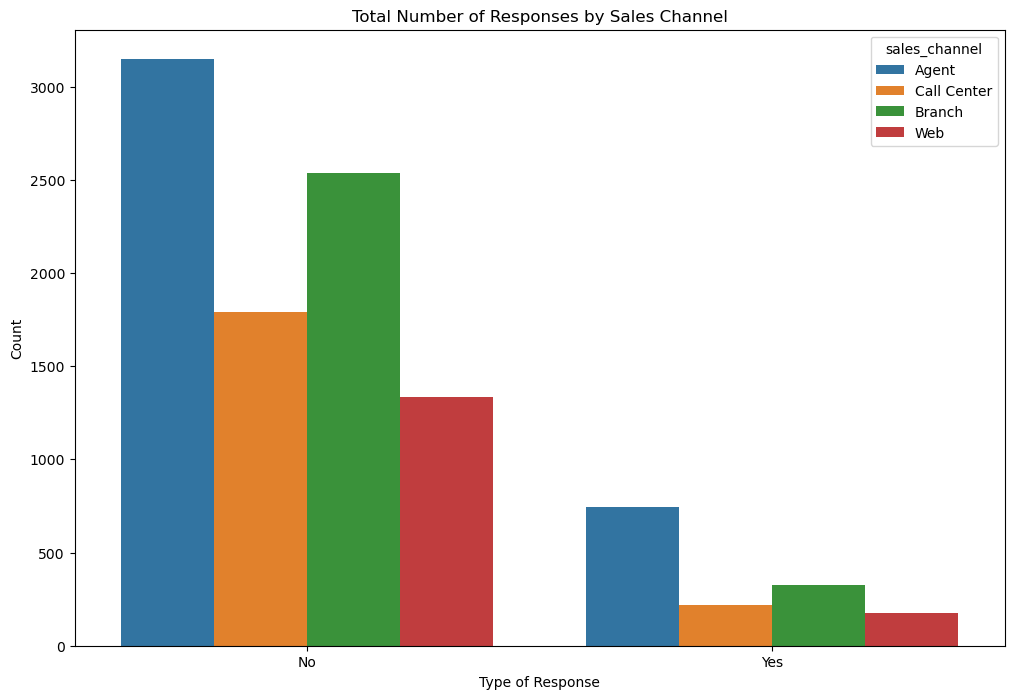

In [25]:
plt.figure(figsize=(12,8))
sns.countplot('response', hue='sales_channel', data=data)
plt.xlabel('Type of Response')
plt.ylabel('Count')
plt.title('Total Number of Responses by Sales Channel')

### Show a plot of the response rate by the total claim amount.

NameError: name 'barplot' is not defined

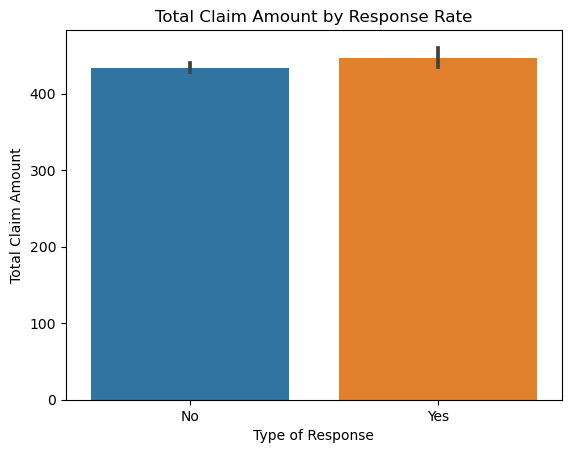

In [41]:
sns.barplot(x='response', y ="total_claim_amount", data = data)
plt.xlabel('Type of Response')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount by Response Rate')
plt.show()


### Show a plot of the response rate by income.

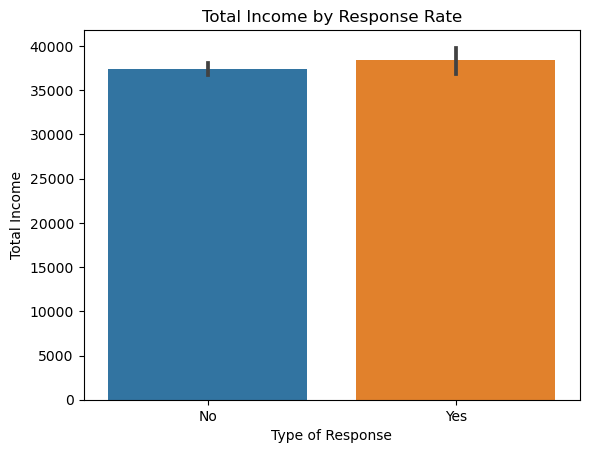

In [42]:
sns.barplot(x='response', y ="income", data = data)
plt.xlabel('Type of Response')
plt.ylabel('Total Income')
plt.title('Total Income by Response Rate')
plt.show()